## Distributed System Health Prediction - EDA
```
Author: Will Kusper

Date: 1/13/2026

Goal: To understand the dataset prior to building any models or preprocessing
```

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('../data/distributed_system_architecture_stress_dataset.csv')

In [10]:
# Display dataset dimensions and column names
num_rows, num_cols = df.shape
print(f'The dataset contains {num_rows} rows and {num_cols} columns.')
column_names = df.columns.tolist()
print('Column names:', column_names)

print('\n')
# Print number of null values in the dataset and the records that contain them
null_values = df.isnull().sum()
print('Total null values in dataset:', null_values.sum())
null_records = df[df.isnull().any(axis=1)]
if not null_records.empty:
    print('Records with null values:')
    print(null_records)
else:
    print('No records with null values found.')

print('\n')
# Display frequency table for each categorical column
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f'Frequency table for column "{col}":')
    freq_table = pd.DataFrame({ 
        'Count': df[col].value_counts(),
        'Percentage': (df[col].value_counts(normalize=True) * 100).apply(lambda x: f"{x:.2f}%")
    })
    print(freq_table)
    print('\n')

# Display summary statistics for each numerical column
numerical_columns = df.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    print(f'Summary statistics for column "{col}":')
    summary_stats = df[col].describe()
    print(summary_stats)
    print('\n')

The dataset contains 200000 rows and 21 columns.
Column names: ['architecture_type', 'deployment_type', 'communication_type', 'num_services', 'num_databases', 'requests_per_second', 'avg_payload_kb', 'read_write_ratio', 'peak_traffic_multiplier', 'cpu_utilization_percent', 'memory_utilization_percent', 'network_latency_ms', 'packet_loss_percent', 'avg_latency_ms', 'p95_latency_ms', 'error_rate_percent', 'db_connection_pool_exhausted', 'retry_storm_detected', 'circuit_breaker_open', 'system_state', 'root_cause']


Total null values in dataset: 0
No records with null values found.


Frequency table for column "architecture_type":
                   Count Percentage
architecture_type                  
hybrid             40283     20.14%
monolith           40157     20.08%
serverless         40118     20.06%
event_driven       40005     20.00%
microservices      39437     19.72%


Frequency table for column "deployment_type":
                 Count Percentage
deployment_type               

## Key Observations
```
The dataset has 200,000 rows and 21 columns

The target variable `system_state` has 4 values : "healthy", "degraded", "cascading_failure", and "total_outage"

There is a major class imbalance in the `root_cause` and `system_state` columns.
    - In `system_state`, only ~0.62% of records are either "cascading_failure" or "total_outage", meaning limited testing against those states.
    - In `root_cause`, only ~1.30% of records have a root cause other than "none"

No missing values present in the dataset
```

## Distribution of System States

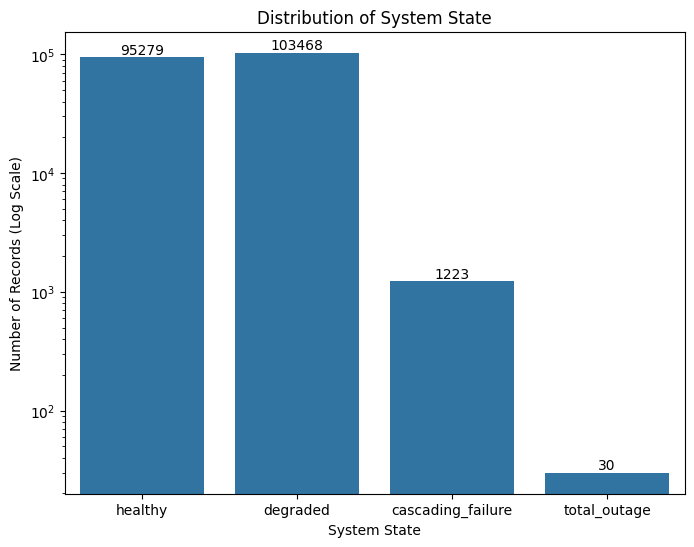

In [ ]:

# Visualize distribution of 'system_state' variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='system_state')
plt.title('Distribution of System State')
plt.xlabel('System State')
plt.ylabel('Number of Records (Log Scale)')
plt.yscale('log')  # Use logarithmic scale for better visibility of the two smaller classes

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()

### What this shows :

This visualization shows just how dramatic the the difference is between the number of 'healthy' or 'degraded' systems when compared to the other two states. Even on a logarithmic scale, there is a very large difference between the bars that show 'healthy' and 'degraded', and the bars for 'cascading_failure' and 'total_outage' This disparity matters because it shows how difficult it is for distributed systems to reach a state worse than being 'degraded'.